# knn 최근접 알고리즘

### 데이터 적재

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("cancer의 키: {}".format(cancer.keys()))

cancer의 키: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(cancer['DESCR'][:193]+ "\n...") #'DESCR' : 데이터셋 설명

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 n
...


In [5]:
print("타깃의 이름: {}".format(cancer['target_names']))

타깃의 이름: ['malignant' 'benign']


In [6]:
print("특성의 이름: {}".format(cancer['feature_names']))

특성의 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print('data의 타입: {}'.format(type(cancer['data']))) #샘플이 하나의 행, 특성이 하나의 열로 구성된 data
print("data의 크기: {}".format(cancer['data'].shape))

data의 타입: <class 'numpy.ndarray'>
data의 크기: (569, 30)


In [8]:
print("data의 처음 다섯 행:\n{}".format(cancer['data'][:5]))

data의 처음 다섯 행:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 

In [9]:
print("target의 타입: {}".format(type(cancer['target'])))   #레이블을 담고있는 키.(type: np.ndarray)
print("target의 크기: {}".format(cancer['target'].shape))

target의 타입: <class 'numpy.ndarray'>
target의 크기: (569,)


In [10]:
print("타깃:\n{}".format(cancer['target']))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 

### 성과 측정: 훈련 데이터와 테스트 데이터

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
cancer = load_breast_cancer()

In [13]:
X,y = cancer['data'], cancer['target']  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#train_test_split 함수를 이용해 데이터셋을 훈련데이터(75%), 테스트데이터(25%)로 나눠준다.
#random_state=0을 해서 임의 분류가 재현 가능하도록 설정한다.

In [15]:
print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

X_train 크기: (426, 30)
y_train 크기: (426,)


In [16]:
print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))

X_test 크기: (143, 30)
y_test 크기: (143,)


### k-최근접 이웃 알고리즘

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train, y_train) #knn객체 자체를 반환 -> 모델을 생성한 매개변수를 확인할 수 있다

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 예측하기

In [19]:
X_new = np.array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01, 3.001e-01,
                   1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01, 8.589e+00, 1.534e+02,
                   6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02, 3.003e-02, 6.193e-03, 2.538e+01,
                   1.733e+01, 1.846e+02, 2.019e+03, 1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01,
                   4.601e-01, 1.189e-01]])
  
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 30)


In [20]:
prediction = knn.predict(X_new)           # X_new의 예측값 구하기
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
cancer['target_names'][prediction]))

예측: [0]
예측한 타깃의 이름: ['malignant']


In [21]:
y_predict = knn.predict(X_test)  #X_test에 대한 예측값 구하기
print("테스트 세트에 대한 예측값: \n {}".format(y_predict))

테스트 세트에 대한 예측값: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


### 오차행렬 구하기

In [22]:
y_train_m = (y_train == 0)
y_test_m = (y_test == 0)

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred_knn = cross_val_predict(knn, X_train, y_train_m, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_m, y_train_pred_knn)        #오차행렬. 

#TN = '0아님.즉 1'로 정확히 분류
#FP = '0'이라고 잘못 분류 
#FN = '0아님. 즉 1'로 잘못 분류 
#TP = '0'이라고 정확히 분류

array([[255,  12],
       [ 20, 139]], dtype=int64)

### 정밀도와 재현율

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_m, y_train_pred_knn)      #정밀도

0.9205298013245033

In [26]:
recall_score(y_train_m, y_train_pred_knn)     #재현율

0.8742138364779874

In [27]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.92


# SGDClassifier 적용

In [28]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
cancer = load_breast_cancer()

In [31]:
X,y = cancer['data'], cancer['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 
#knn 알고리즘과 마찬가지로 훈련/테스트 셋 나누기

In [33]:
list(cancer.target_names)

['malignant', 'benign']

In [34]:
some_cancer=X[0]

In [35]:
y_train_m = (y_train == 0)
y_test_m = (y_test == 0)
#악성 종양임 & 악성 종양 아님 두개의 클래스로 분류할 수 있는 이진 분류기.
#y_train 벡터 중 악성 종양(malignant)이면 true, 아니면 false 반환

In [36]:
y_test_m[7]   #test set의 7번째 데이터는 악성종양인가? no

True

In [37]:
y_train_m[7]   #train set 7번째 데이터는 악성종양인가? no

False

In [38]:
print("X_train의 크기: {}".format(X_train.shape))        #크기, shape 다시한번 확인.
print("y_train_m의 크기: {}".format(y_train_m.shape))

X_train의 크기: (426, 30)
y_train_m의 크기: (426,)


In [39]:
print("X_train의 타입: {}".format(type(X_train)))      #데이터 타입 다시한번 확인.
print("y_train_m의 타입: {}".format(type(y_train_m)))

X_train의 타입: <class 'numpy.ndarray'>
y_train_m의 타입: <class 'numpy.ndarray'>


### 확률적 경사하강법 분류기

In [40]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter= 5, random_state=42)
sgd_clf.fit(X_train, y_train_m)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [41]:
sgd_clf.predict([some_cancer])      #악성 종양 감지해보기

array([ True])

### cross_val_score 함수를 이용한 분류기 평가 - 각 교차 검증에 대한 정확도 반환

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_m, cv=3, scoring="accuracy")

array([0.87412587, 0.78169014, 0.91489362])

### 1. 오차행렬 구하기

In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_m, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_m, y_train_pred)        #오차행렬. 

#TN = '0아님.즉 1'로 정확히 분류
#FP = '0'이라고 잘못 분류 
#FN = '0아님. 즉 1'로 잘못 분류  
#TP = '0'이라고 정확히 분류 

array([[260,   5],
       [ 56, 105]], dtype=int64)

In [45]:
y_train_perfect_predictions = y_train_m

In [46]:
confusion_matrix(y_train_m, y_train_perfect_predictions)  #완벽한 분류기 만들기

array([[265,   0],
       [  0, 161]], dtype=int64)

### 2. 정밀도와 재현율

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_m, y_train_pred)        #정밀도
#악성종양으로 판별된 사람들 중 실제 악성종양인 사람의 비율. 나머지는 양성종양.

0.9545454545454546

In [48]:
recall_score(y_train_m, y_train_pred) #재현율 #전체 악성종양 중에서 재현율 만큼만 감지

0.6521739130434783

### 3. thresholds 바꿔가며 정밀도와 재현율 측정

In [49]:
y_scores = sgd_clf.decision_function([some_cancer])
y_scores

array([11587065.4428968])

In [50]:
threshold = 0
y_some_cancer_pred = (y_scores > threshold)

In [51]:
y_some_cancer_pred

array([ True])

In [52]:
threshold = 1000000
y_some_cancer_pred = (y_scores > threshold)
y_some_cancer_pred

array([ True])

In [53]:
threshold = 100000000        #임계값을 높일수록 재현율이 갑소함을 알 수 있다
y_some_cancer_pred = (y_scores > threshold)
y_some_cancer_pred

array([False])

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_m, cv=3, method = "decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_m, y_scores)

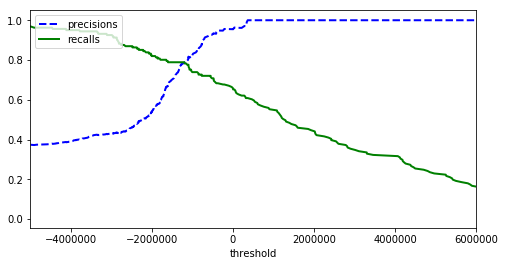

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="precisions", linewidth=2)
    plt.plot(thresholds, recalls[:-1],"g-",label="recalls", linewidth=2)
    plt.xlabel("threshold", fontsize=10)
    plt.legend(loc="upper left", fontsize=10)
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-5000000, 6000000])
plt.show()

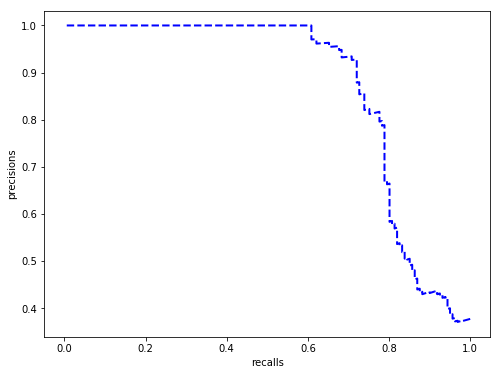

In [57]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", linewidth=2)
    plt.xlabel("recalls", fontsize=10)
    plt.ylabel("precisions",fontsize=10)
    
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### 4. 정밀도 vs 재현율 어떤것이 더 중요? 적절한 thresholds 값은?

### 이 데이터에서는 재현율이 더 중요합니다. 재현율이 높을 수록 악성종양을 가진 사람의 수를 감지할 확률이 증가하기 떄문입니다. 
### 정밀도가 높다면 악성종양으로 판별된 사람이 진짜 악성종양일 확률이 높아지지만, 양성종양으로 잘못 판별되었더라도 그 위험도가 종양 판정을 아예 못받는 것보다 낮다고 생각합니다.
### 위의 그래프에서 정밀도가 급격하게 줄어들기 시작하는 재현율 60%지점을 트레이드 오프 지점으로 선택하는 것이 좋습니다. 이에 따르면 적절한 thresholds 값은 약 1500000입니다.

### 5. k-최근접 이웃과 SGDClassifier 성능 차이?

### K- nn 알고리즘의 정밀도 : 0.920, 재현율=0.874
### SGDClassifier의 정밀도 = 0.955, 재현율 = 0.652
### 이 데이터에서는 K-최근접 이웃 분류기의 성능이 SGDClassifier보다 좋습니다.